## Code for Producing Images in Lecture Notes

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


## Linear Regression Figures

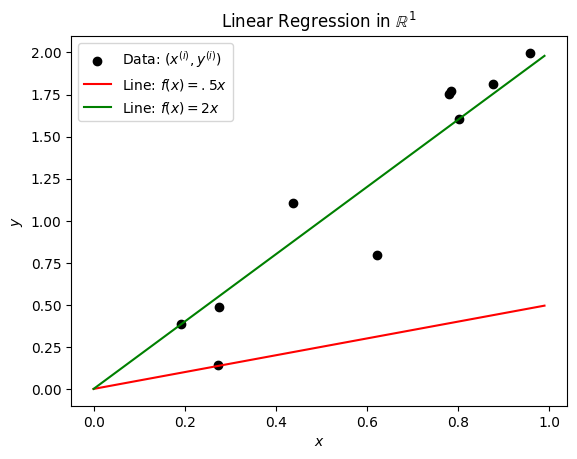

In [5]:
np.random.seed(1234) # Seed randomness

n = 10 # Number of observations
w = 2 # True parameter
X = np.random.rand(n) # x-values
y = X.dot(w).T + np.random.normal(size=n) * .2 #y-values

plt.scatter(X,y, color='black', label=r'Data: $(x^{(i)}, y^{(i)})$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
xaxis = np.arange(0,1,.01)
plt.plot(xaxis, xaxis*.5, label=r'Line: $f(x) = .5x$', color='red')
plt.plot(xaxis, xaxis*w, label=r'Line: $f(x) = 2x$', color='green')
plt.legend()
plt.title(r'Linear Regression in $\mathbb{R}^1$')
plt.savefig('images/regression_1d.pdf')

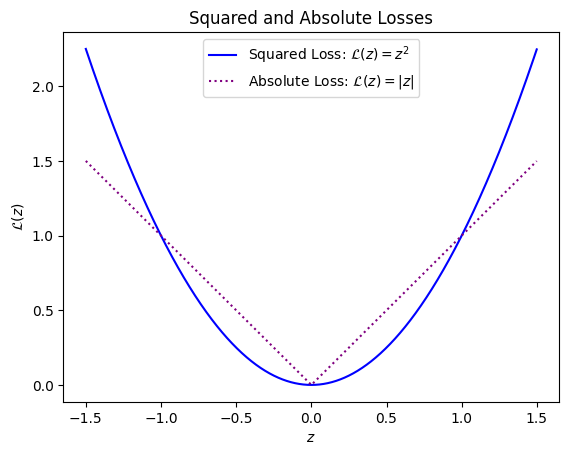

In [6]:
plt.xlabel(r'$z$')
plt.ylabel(r'$\mathcal{L}(z)$')
xaxis = np.arange(-1.5,1.5,.001)
plt.plot(xaxis, xaxis**2, label=r'Squared Loss: $\mathcal{L}(z)=z^2$', color='blue')
plt.plot(xaxis, np.abs(xaxis), label=r'Absolute Loss: $\mathcal{L}(z)=|z|$', color='purple', linestyle='dotted')
plt.legend()
plt.title(r'Squared and Absolute Losses')
plt.savefig('images/regression_losses.pdf')

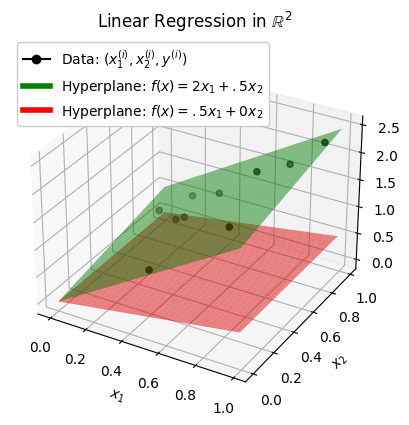

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Seed randomness
np.random.seed(1234)
n = 10  # Number of observations
w = np.array([2, .5])  # True parameter
X = np.random.rand(n, 2)  # x-values
y = X.dot(w).T + np.random.normal(size=n) * .1  # y-values

# Create figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for data points
ax.scatter(X[:, 0], X[:, 1], y, color='black', label=r'Data: $(x_1^{(i)}, x_2^{(i)}, y^{(i)})$')

# Hyperplane 1: Green
x1 = np.arange(0, 1, .01)
x2 = np.arange(0, 1, .01)
X1, X2 = np.meshgrid(x1, x2)
Z = w[0] * X1 + w[1] * X2
ax.plot_surface(X1, X2, Z, alpha=.5, color='green')

# Hyperplane 2: Red
ax.plot_surface(X1, X2, .5 * X1 + 0 * X2, alpha=.5, color='red')

# Labels and title
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$y$')
ax.set_title(r'Linear Regression in $\mathbb{R}^2$')

# Manually create custom legend handles for the surfaces
handles = [
    Line2D([0], [0], marker='o', color='black', markerfacecolor='black', markersize=6, label=r'Data: $(x_1^{(i)}, x_2^{(i)}, y^{(i)})$'),
    Line2D([0], [0], color='green', lw=4, label=r'Hyperplane: $f(x) = 2x_1 + .5x_2$'),
    Line2D([0], [0], color='red', lw=4, label=r'Hyperplane: $f(x) = .5x_1 + 0x_2$')
]

# Add legend
plt.legend(handles=handles, loc='upper left', framealpha=1)

# Save the figure
plt.savefig('images/regression_2d.pdf', bbox_inches='tight')
plt.show()


## Non-linear Regression Figures

/opt/homebrew/Caskroom/miniconda/base/envs/rads/lib/python3.10/site-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:4316.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


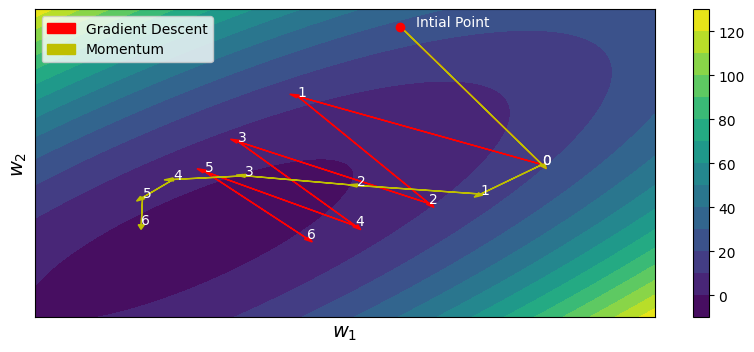

In [8]:
## Gradient descent

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import torch

%matplotlib inline

class QuadFunc:
  def __init__(self, a, b, c, d, e):
    self.a = a
    self.b = b
    self.c = c
    self.d = d
    self.e = e

  def getParams(self, x, y):
    if y is None:
      y = x[1]
      x = x[0]
    return x,y

  def __call__(self, x, y=None):
    x,y = self.getParams(x,y)
    return 0.5 * (self.a*x**2 + self.b*y**2) + self.c * x * y + self.d * x + self.e * y

  def grad(self, x, y=None):
    #df/dx = ax + cy + d
    #df/dy = by + cx + e
    x,y = self.getParams(x,y)
    return torch.tensor([self.a * x + self.c * y + self.d, self.b * y + self.c * x + self.e])

  def hess(self, x, y=None):
    #d2f/dx2 = a
    #d2f/dy2 = b
    #d2f/dxdy = c
    #d2f/dydx = c
    x, y = self.getParams(x,y)
    return torch.tensor([[self.a, self.c], [self.c, self.b]])

class GradientDescent:
    def __init__(self, lr=1, b1=0.9, b2=0.999):
        # b1 -> Momentum
        # b2 -> ADAM
        # ADAM Paper -> https://arxiv.org/abs/1412.6980
        self.lr = lr # learning rate
        self.b1 = b1 # grad aggregation param (for Momentum)
        self.b2 = b2 # grad^2 aggregation param (for ADAM)

        self.v = 0 # grad aggregation param
        self.w = 0 # grad^2 aggregation param
        self.t = 0

        self.eps = 1e-9

    def __call__(self, grad,hess):

        self.t += 1


        # aggregation
        self.v = self.b1*self.v + (1-self.b1)*grad
        self.w = self.b2*self.w + (1-self.b2)*grad**2

        # bias correction
        vcorr = self.v/(1-self.b1**self.t)
        wcorr = self.w/(1-self.b2**self.t) if self.b2 != 0 else 1

        return -1*self.lr*vcorr/(wcorr**0.5 + self.eps)

class Newtons:
    # https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization
    def __init__(self, lr=1):
        self.lr = lr

    def __call__(self,grad,hess):
        return -1*self.lr*torch.matmul(torch.inverse(hess), grad)

def runOptim(init,optim,func,steps):

    curpos = init # current position
    path = [curpos]


    for _ in range(steps):

        grad = func.grad(curpos)
        hess = func.hess(curpos)

        dx = optim(grad,hess)
        curpos = curpos + dx
        path.append(curpos)

    return path


def showPath(func,init,paths,labels,colors,levels):

    x = torch.arange(-10,10,0.05)
    y = torch.arange(-10,10,0.05)

    # create meshgrid
    xx, yy = torch.meshgrid(x,y)
    zz = func(xx,yy)

    # create contour
    fig, ax = plt.subplots(1,1,figsize=(10,4))
    cp = ax.contourf(xx,yy,zz,levels)
    fig.colorbar(cp)

    # mark initial point
    ax.plot(init[0],init[1],'ro')
    ax.text(init[0]+0.5,init[1],'Intial Point',color='white')

    # Plot paths
    for pnum in range(len(paths)):
        for i in range(len(paths[pnum])-1):
            curpos = paths[pnum][i]
            d = paths[pnum][i+1] - curpos
            ax.arrow(curpos[0],curpos[1],d[0],d[1],color=colors[pnum],head_width=0.2)
            ax.text(curpos[0]+d[0],curpos[1]+d[1],str(i),color='white')

    # Add legend
    legends = []
    for col in colors:
        legends.append(mpatches.Patch(color=col))
    # Put legend in top left corner
    ax.legend(legends,labels, loc='upper left')


a = 1/torch.sqrt(torch.tensor(2.0))
init = torch.matmul(torch.tensor([[a,a],[-a,a]]),torch.tensor([-5.0,7.5]))
ell = QuadFunc(a,a,-0.8*a,a,a)
steps = 7
lr = 1.5
regGD = GradientDescent(lr,0,0) # Without Momentum
momGD = GradientDescent(lr,0.9,0) # Momentum
path1 = runOptim(init,regGD,ell,steps)
path2 = runOptim(init,momGD,ell,steps)
# Set figure size
showPath(ell,init,[path1,path2],['Gradient Descent','Momentum'],['r','y'], 15)
# Turn off axis ticks
plt.xticks([])
plt.yticks([])
plt.xlabel(r'$w_1$', fontsize=14)
plt.ylabel(r'$w_2$', fontsize=14)
plt.savefig('images/regression_momentum.pdf', bbox_inches='tight', dpi=300)

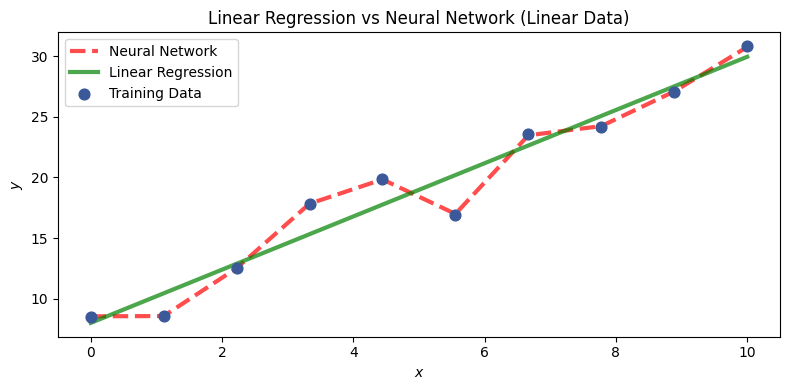

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Step 1: Generate noisy linear data
n = 10 # Number of observations
np.random.seed(0)
X = np.linspace(0, 10, n).reshape(-1, 1)
true_slope = 2.5
true_intercept = 5
noise = np.random.normal(0, 2, n).reshape(-1, 1)  # Gaussian noise
y = true_slope * X + true_intercept + noise
y = y.ravel()

# Step 2: Fit linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_lin_pred = lin_reg.predict(X)

# Step 3: Train neural network using scikit-learn
# It's often helpful to scale data for MLPs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

mlp = MLPRegressor(hidden_layer_sizes=(16, 32, 64, 32, 16), activation='relu', max_iter=10000)
mlp.fit(X_scaled, y)
y_nn_pred = mlp.predict(X_scaled)

# Step 4: Plotting
plt.figure(figsize=(8, 4))

plt.plot(X, y_nn_pred, color='red', label='Neural Network', linewidth=3, alpha=0.7, zorder=1, linestyle='--')   # Muted Maroon
plt.plot(X, y_lin_pred, color='green', label='Linear Regression', linewidth=3, alpha=0.7, zorder=1)  # Medium Olive
plt.scatter(X, y, label='Training Data', marker='o', color='#3B5998', s=60, zorder=2)  # Deep Cornflower Blue

plt.legend()
plt.title('Linear Regression vs Neural Network (Linear Data)')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.tight_layout()
plt.savefig('images/regression_overfitting.pdf', bbox_inches='tight', dpi=300)

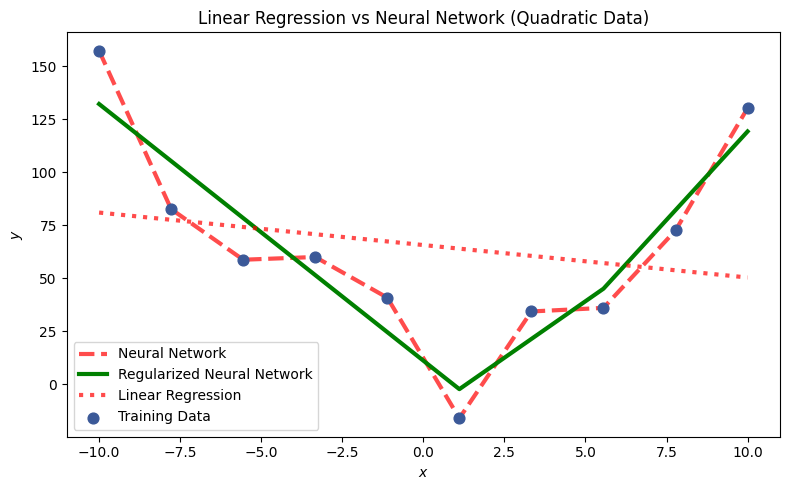

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Step 1: Generate noisy quadratic data
# seed
np.random.seed(0)
n = 10  # More points for smoother curve
X = np.linspace(-10, 10, n).reshape(-1, 1)
true_a = 1.2
true_b = -3.4
true_c = 2.0
noise = np.random.normal(0, 20, n).reshape(-1, 1)  # Gaussian noise
y = true_a * X**2 + true_c + noise
y = y.ravel()

# Step 2: Fit linear regression model (will underfit)
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_lin_pred = lin_reg.predict(X)

# Step 3: Scale data for MLPs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train standard MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(16, 32, 64, 32, 16), activation='relu',
                   max_iter=10000, random_state=0)
mlp.fit(X_scaled, y)
y_nn_pred = mlp.predict(X_scaled)

# Step 5: Train regularized MLPRegressor (L2 regularization via alpha)
mlp_reg = MLPRegressor(hidden_layer_sizes=(16, 32), activation='relu',
                       alpha=20, max_iter=10000, random_state=0)
mlp_reg.fit(X_scaled, y)
y_nn_reg_pred = mlp_reg.predict(X_scaled)

# Step 6: Plot results
plt.figure(figsize=(8, 5))

plt.plot(X, y_nn_pred, color='red', label='Neural Network', linewidth=3, alpha=0.7, zorder=1, linestyle='--')
plt.plot(X, y_nn_reg_pred, color='green', label='Regularized Neural Network', linewidth=3, zorder=1)
plt.plot(X, y_lin_pred, color='red', label='Linear Regression', linewidth=3, alpha=0.7, zorder=1, linestyle=':')
plt.scatter(X, y, label='Training Data', marker='o', color='#3B5998', s=60, zorder=2)

plt.legend()
plt.title('Linear Regression vs Neural Network (Quadratic Data)')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.tight_layout()
plt.savefig('images/regression_regularization.pdf', bbox_inches='tight', dpi=300)
plt.show()
